**CaFE** dataset consists of 72 sentences read in French Canadian. Each sentence is read with 7 different emotions, and each emotion is expressed at a different strength (Weakly or Strongly, except for Neutral emotion that only has one strength).

This makes in total $ 72 \times (6 \times 2 + 1 )  = 936 $ sound samples

---

EDA steps:

1. vectorization the data
2. do cluster in one language to find the difference between each emotions
3. find the difference between one emotion in different languages

In this notebook, we will only work on low res samples.

#0. Import the data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#below is my path to CaFE low res dataset, you can change it to yours
%cd /content/drive/MyDrive/MSER/data/CaFE/Low resolution (48kHz)
!ls

/content/drive/.shortcut-targets-by-id/18l0PUg8bbJjPh33m-1zTNzwtt5IlgTHw/MSER/data/CaFE/Low resolution (48kHz)
Colère	Joie	     Neutre  Readme.txt  Tristesse
Dégoût	License.txt  Peur    Surprise	 Version-ChangeLog.txt




---


The format of audio files is **.wav for low res audio**, and **.aiff for high res audio**.




#0.1. Let's explore the data quickly

Firstly, let's hear a sample of the CaFE dataset.

In [5]:
from IPython.display import Audio, display

print('Angry:')
display(Audio('./Colère/Fort/01-C-2-2.wav', autoplay=False)) #angry

print('\nJoyful:')
display(Audio('./Joie/Fort/07-J-2-4.wav', autoplay=False)) #joyful

print('\nSad:')
display(Audio('./Tristesse/Fort/11-T-2-5.wav', autoplay=False)) #sad

Angry:



Joyful:



Sad:




---



Let's build a dataframe for future EDA:

In [33]:
import os
import pandas as pd

folder_list = os.listdir()
ban_list = ['License.txt', 'Readme.txt', 'Version-ChangeLog.txt']

folder_list = [folder for folder in folder_list if folder not in ban_list]

strengths = ['Fort', 'Faible']

dic = {'emo': [],
       'strength':[],
       'file_name':[],
       'file_path':[]
}
for folder in folder_list:
  if folder != "Neutre": #neutral only has one strength
    for strength in strengths:
      file_list = os.listdir(f'./{folder}/{strength}/')

      for i in file_list:
        dic['emo'].append(folder)
        dic['strength'].append(strength)
        dic['file_name'].append(i)
        dic['file_path'].append(f'./{folder}/{strength}/{i}')

  else:
    file_list = os.listdir(f'./{folder}/')
    for i in file_list:
        dic['emo'].append(folder)
        dic['strength'].append('Neutre')
        dic['file_name'].append(i)
        dic['file_path'].append(f'./{folder}/{i}')

df = pd.DataFrame(dic)
df.head()

,emo,strength,file_name,file_path
0,Tristesse,Fort,01-T-2-2.wav,./Tristesse/Fort/01-T-2-2.wav
1,Tristesse,Fort,01-T-2-6.wav,./Tristesse/Fort/01-T-2-6.wav
2,Tristesse,Fort,01-T-2-1.wav,./Tristesse/Fort/01-T-2-1.wav
3,Tristesse,Fort,01-T-2-4.wav,./Tristesse/Fort/01-T-2-4.wav
4,Tristesse,Fort,01-T-2-3.wav,./Tristesse/Fort/01-T-2-3.wav


Let's translate all these french words to english.

In [34]:
french_to_eng = {'Tristesse': 'Sadness',
                 'Surprise': 'Surprise',
                 'Joie': 'Joy',
                 'Peur': 'Fear',
                 'Dégoût': 'Disgust',
                 'Colère': 'Anger',
                 'Neutre': 'Neutral',
                 'Fort': 'Strong',
                 'Faible': 'Weak'
                 }

df['emo'] = df['emo'].map(lambda word: french_to_eng[word])
df['strength'] = df['strength'].map(lambda word: french_to_eng[word])

df.head()

,emo,strength,file_name,file_path
0,Sadness,Strong,01-T-2-2.wav,./Tristesse/Fort/01-T-2-2.wav
1,Sadness,Strong,01-T-2-6.wav,./Tristesse/Fort/01-T-2-6.wav
2,Sadness,Strong,01-T-2-1.wav,./Tristesse/Fort/01-T-2-1.wav
3,Sadness,Strong,01-T-2-4.wav,./Tristesse/Fort/01-T-2-4.wav
4,Sadness,Strong,01-T-2-3.wav,./Tristesse/Fort/01-T-2-3.wav


---

**Are emotions equally represented?**

In [23]:
df['emo'].value_counts()

Sadness     144
Surprise    144
Joy         144
Fear        144
Disgust     144
Anger       144
Neutral      72
Name: emo, dtype: int64

All emotions are represented equally, except Neutral that has only 72 samples. It is due to the fact that Neutral has only been recorded in one strength (which makes sense).

////BELOW: work on progress

In [47]:
#below: same sentence, expressed

print('\nJoyful (strong):')
display(Audio('./Joie/Fort/01-J-2-1.wav', autoplay=False))

print('Angry (strong):')
display(Audio('./Colère/Fort/01-C-2-1.wav', autoplay=False))


Joyful (strong):


Angry (strong):


In [48]:
from scipy.io import wavfile
samplerate_A, data_A = wavfile.read('./Colère/Fort/01-C-2-1.wav')
samplerate_J, data_J = wavfile.read('./Joie/Fort/01-J-2-1.wav')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until


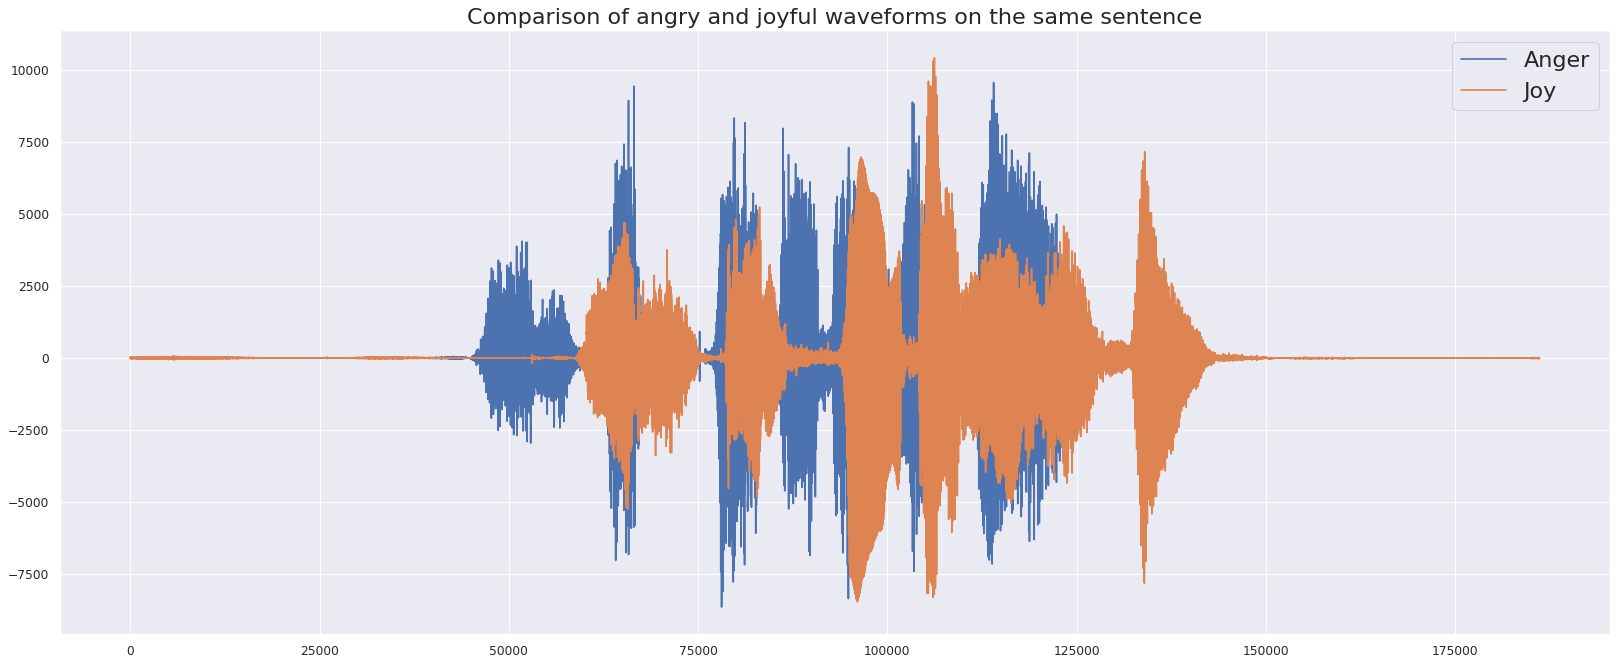

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
sns.set()
plt.figure(figsize=(25,10), dpi=80)

plt.plot(data_A, label = 'Anger')

plt.plot(data_J, label = 'Joy')

plt.title('Comparison of angry and joyful waveforms on the same sentence', fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

There is definitely a difference.